### Tasks to do after conversation with Adam

**Robustness to noise**

Express noise as % instead of absolute change. Typically tested 1%, 10%, 100%, or 1%, 2%, 4%, 8%... In many papers, only 10% noise shown, but this is an arbitrary decision.
Determine whether the output is qualitatively the same as without noise.

**Sensitivity to parameters**

We did not discuss much about this, but I undersand that parameters are selected, different values are tested, and the output is measured.

**Variability of curves**

Extract features from auxin profile: position of auxin min (sinus) and max (peak), amplitude of auxin peak (max - min), width. scypy.signal has functions to do this.
Most relevant for robustness to noise (and sesitivity to params?): position of features

Leafi: We could do analysis of covariance. Leafi accepts csv files with arrays of x,y points. It can also calculate CI to know when enough replicates done.


In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

%matplotlib inline

data = pd.read_csv('../out_batch/batch_2023-03-20_14-30-00_dual_single/auxin_profile_1.csv')
data.rename(columns = {'0':'y'}, inplace = True)
data['x'] = np.linspace(1, len(data.index), len(data.index))

In [3]:
data

,y,x
0,230.915831,1.0
1,243.939117,2.0
2,131.294018,3.0
3,72.443509,4.0
4,41.501314,5.0
5,47.500058,6.0
6,41.453764,7.0
7,54.431478,8.0
8,109.994289,9.0
9,74.335817,10.0


In [9]:
data['y'][8]

109.9942887791375

In [26]:
peaks = find_peaks(data['y'], height = 25, threshold = 10, distance = 1)
peaks_heights = peaks[1]['peak_heights'] #list of the heights of the peaks
peaks_pos = data['x'][peaks[0][0]] #list of the peaks positions

peaks

(array([1, 8]),
 {'peak_heights': array([243.93911684, 109.99428878]),
  'left_thresholds': array([13.023286  , 55.56281067]),
  'right_thresholds': array([112.64509931,  35.65847215])})

In [27]:
peaks_pos

2.0

In [28]:
peaks_heights

array([243.93911684, 109.99428878])

ValueError: x and y must be the same size

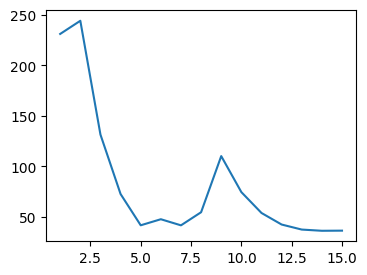

In [29]:
fig, ax = plt.subplots(1,1, figsize=(4,3))
ax.plot(data['x'], data['y'])
ax.scatter(peaks_pos, peaks_heights, color = 'r', s = 15, marker = 'D', label = 'Maxima')
plt.show()